# Dependencies

In [1]:
from ultralytics import YOLO
from IPython.display import display, Image
from dotenv import load_dotenv
from roboflow import Roboflow
import os

In [6]:
MODEL = "yolov8pb.pt"
ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")

## Test Setup

Ultralytics YOLOv8.0.203 🚀 Python-3.9.18 torch-2.1.0 CPU (Apple M1 Max)
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 10.6MB/s]
image 1/1 /Users/pandoks/Documents/beta-tracker/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 244.5ms
Speed: 1.5ms preprocess, 244.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to models/yolo/example/runs/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


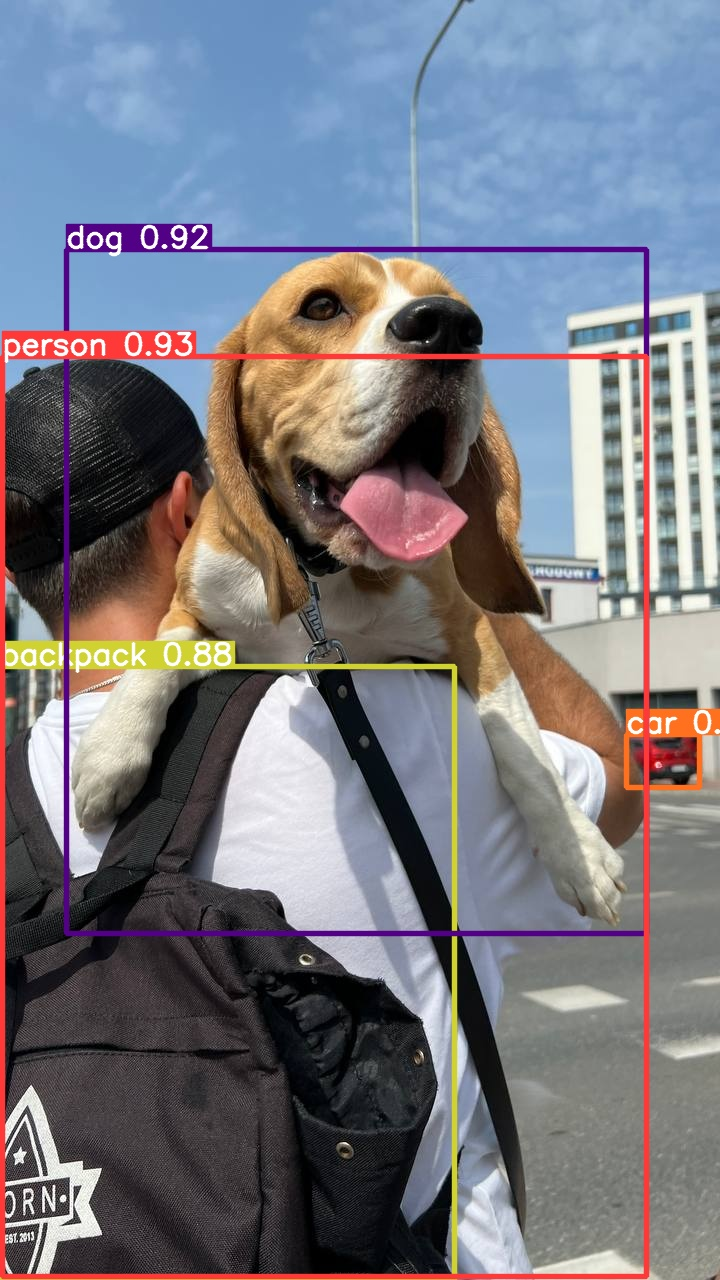

In [3]:
#@markdown CLI example
!yolo task=detect mode=predict model="./models/yolo/{MODEL}" conf=0.25 source="https://media.roboflow.com/notebooks/examples/dog.jpeg" project="./models/yolo/example/runs"
Image(filename='./models/yolo/example/runs/predict/dog.jpeg', height=600)

In [8]:
#@markdown SDK example
model = YOLO(f'./models/yolo/{MODEL}')
results = model.predict(source = "https://media.roboflow.com/notebooks/examples/dog.jpeg", conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /Users/pandoks/Documents/beta-tracker/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 278.0ms
Speed: 1.1ms preprocess, 278.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


# Training the Model

## Gathering the Data

In [9]:
ROBOFLOW_WORKSPACE = "roboflow-universe-projects"
ROBOFLOW_PROJECT = "basketball-players-fy4c2"
DATASET_DIR = "data/yolo/basketball-players-fy4c2"
TRAIN_DIR = "models/yolo/custom"

In [10]:
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
dataset = project.version(16).download("yolov8", DATASET_DIR)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.203, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to data/yolo/basketball-players-fy4c2 in yolov8:: 100%|██████████| 2070/2070 [00:00<00:00, 7032.94it/s]


Go to the location of `DATASET_DIR` and find the file `data.yaml`. Change the locations of `test`, `train`, and `val` so that it is `./test/images`, `./train/images`, and `./valid/images` respectively.

## Train Model

In [22]:
train_command = f"yolo task=detect mode=train model='./models/yolo/{MODEL}' data={dataset.location}/data.yaml epochs=1 project={TRAIN_DIR}"
os.system(train_command)

Ultralytics YOLOv8.0.203 🚀 Python-3.9.18 torch-2.1.0 CPU (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=./models/yolo/yolov8x.pt, data=/Users/pandoks/Documents/beta-tracker/data/yolo/basketball-players-fy4c2/data.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=models/yolo/custom/train, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=N

### Validate Model

In [13]:
validate_command = f"yolo task=detect mode=val model='{TRAIN_DIR}/train/weights/best.pt' conf=0.25 data={dataset.location}/data.yaml project={TRAIN_DIR}"
os.system(validate_command)

Ultralytics YOLOv8.0.203 🚀 Python-3.9.18 torch-2.1.0 CPU (Apple M1 Max)
Model summary (fused): 268 layers, 68132235 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /Users/pandoks/Documents/beta-tracker/data/yolo/basketball-players-fy4c2/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:31<00:00, 15.89s/it]
                   all         28        432      0.892      0.858      0.887      0.661
                  Ball         28         17      0.954      0.471      0.683      0.479
                  Hoop         28         18      0.842      0.889      0.852      0.688
                Period         28         23      0.936       0.87      0.913      0.685
                Player         28        219      0.971      0.785      0.909      0.653
                   Ref         28         49      0.929      0.806      0.879  

0

### Extract Data from Training

In [22]:
model = YOLO(f"{TRAIN_DIR}/train/weights/best.pt")
results = model.predict(source="data/yolo/video.mp4", project=f"{TRAIN_DIR}", conf=0.25, stream=True)
for r in results:
    boxes = r.boxes
    print(boxes)


video 1/1 (1/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 268.6ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.8459])
data: tensor([[5.3418e+02, 9.4440e+01, 9.8699e+02, 7.2000e+02, 8.4587e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[760.5847, 407.2198, 452.8009, 625.5604]])
xywhn: tensor([[0.5942, 0.5656, 0.3538, 0.8688]])
xyxy: tensor([[534.1843,  94.4396, 986.9852, 720.0000]])
xyxyn: tensor([[0.4173, 0.1312, 0.7711, 1.0000]])


video 1/1 (2/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 236.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.7183])
data: tensor([[5.8778e+02, 3.4336e+00, 1.2465e+03, 7.2000e+02, 7.1833e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[917.1526, 361.7168, 658.7407, 716.5664]])
xywhn: tensor([[0.7165, 0.5024, 0.5146, 0.9952]])
xyxy: tensor([[ 587.7822,    3.4336, 1246.5229,  720.0000]])
xyxyn: tensor([[0.4592, 0.0048, 0.9738, 1.0000]])


video 1/1 (3/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 230.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.7585])
data: tensor([[6.2134e+02, 7.8656e+00, 1.2174e+03, 7.1781e+02, 7.5853e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[919.3934, 362.8380, 596.1104, 709.9449]])
xywhn: tensor([[0.7183, 0.5039, 0.4657, 0.9860]])
xyxy: tensor([[ 621.3383,    7.8656, 1217.4486,  717.8105]])
xyxyn: tensor([[0.4854, 0.0109, 0.9511, 0.9970]])


video 1/1 (4/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 225.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.6311])
data: tensor([[4.6033e+02, 0.0000e+00, 1.2400e+03, 7.2000e+02, 6.3112e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[850.1482, 360.0000, 779.6367, 720.0000]])
xywhn: tensor([[0.6642, 0.5000, 0.6091, 1.0000]])
xyxy: tensor([[ 460.3298,    0.0000, 1239.9666,  720.0000]])
xyxyn: tensor([[0.3596, 0.0000, 0.9687, 1.0000]])


video 1/1 (5/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 231.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.5991])
data: tensor([[6.1029e+02, 0.0000e+00, 1.1987e+03, 7.1613e+02, 5.9912e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[904.4969, 358.0632, 588.4128, 716.1263]])
xywhn: tensor([[0.7066, 0.4973, 0.4597, 0.9946]])
xyxy: tensor([[ 610.2905,    0.0000, 1198.7034,  716.1263]])
xyxyn: tensor([[0.4768, 0.0000, 0.9365, 0.9946]])


video 1/1 (6/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 228.6ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.8482])
data: tensor([[6.3089e+02, 7.8038e+00, 1.2165e+03, 7.1294e+02, 8.4818e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[923.7166, 360.3735, 585.6466, 705.1393]])
xywhn: tensor([[0.7217, 0.5005, 0.4575, 0.9794]])
xyxy: tensor([[ 630.8933,    7.8038, 1216.5399,  712.9431]])
xyxyn: tensor([[0.4929, 0.0108, 0.9504, 0.9902]])


video 1/1 (7/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 232.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.8028])
data: tensor([[5.9067e+02, 1.1221e+01, 1.1702e+03, 7.2000e+02, 8.0282e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[880.4170, 365.6105, 579.4878, 708.7790]])
xywhn: tensor([[0.6878, 0.5078, 0.4527, 0.9844]])
xyxy: tensor([[ 590.6731,   11.2210, 1170.1609,  720.0000]])
xyxyn: tensor([[0.4615, 0.0156, 0.9142, 1.0000]])


video 1/1 (8/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 232.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.6645])
data: tensor([[6.1392e+02, 3.2139e+01, 1.2800e+03, 7.1895e+02, 6.6451e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[946.9620, 375.5464, 666.0759, 686.8140]])
xywhn: tensor([[0.7398, 0.5216, 0.5204, 0.9539]])
xyxy: tensor([[ 613.9241,   32.1395, 1280.0000,  718.9534]])
xyxyn: tensor([[0.4796, 0.0446, 1.0000, 0.9985]])


video 1/1 (9/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 228.6ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.7386])
data: tensor([[6.0184e+02, 3.9330e+01, 1.0603e+03, 7.2000e+02, 7.3857e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[831.0540, 379.6648, 458.4264, 680.6705]])
xywhn: tensor([[0.6493, 0.5273, 0.3581, 0.9454]])
xyxy: tensor([[ 601.8408,   39.3295, 1060.2672,  720.0000]])
xyxyn: tensor([[0.4702, 0.0546, 0.8283, 1.0000]])


video 1/1 (10/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 229.5ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.7367])
data: tensor([[6.1887e+02, 5.2792e+01, 1.0328e+03, 7.2000e+02, 7.3669e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[825.8510, 386.3961, 413.9524, 667.2078]])
xywhn: tensor([[0.6452, 0.5367, 0.3234, 0.9267]])
xyxy: tensor([[ 618.8748,   52.7922, 1032.8271,  720.0000]])
xyxyn: tensor([[0.4835, 0.0733, 0.8069, 1.0000]])


video 1/1 (11/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 233.2ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.7833, 0.3849])
data: tensor([[6.1455e+02, 4.9182e+01, 1.2655e+03, 7.1785e+02, 7.8332e-01, 3.0000e+00],
        [6.1012e+02, 4.7035e+01, 1.0580e+03, 7.2000e+02, 3.8489e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[940.0002, 383.5164, 650.9069, 668.6681],
        [834.0519, 383.5176, 447.8723, 672.9648]])
xywhn: tensor([[0.7344, 0.5327, 0.5085, 0.9287],
        [0.6516, 0.5327, 0.3499, 0.9347]])
xyxy: tensor([[ 614.5468,   49.1823, 1265.4536,  717.8504],
        [ 610.1157,   47.0352, 1057.9880,  720.0000]])
xyxyn: tensor([[0.4801, 0.0683, 0.9886, 0.9970],
        [0.4767, 0.0653, 0.8266, 1.0000]])


video 1/1 (12/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 228.5ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.7327])
data: tensor([[5.7871e+02, 4.2172e+01, 1.0186e+03, 7.2000e+02, 7.3269e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[798.6390, 381.0858, 439.8607, 677.8283]])
xywhn: tensor([[0.6239, 0.5293, 0.3436, 0.9414]])
xyxy: tensor([[ 578.7086,   42.1717, 1018.5693,  720.0000]])
xyxyn: tensor([[0.4521, 0.0586, 0.7958, 1.0000]])


video 1/1 (13/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 227.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.7252, 0.6411])
data: tensor([[5.7527e+02, 4.1568e+01, 1.0212e+03, 7.2000e+02, 7.2519e-01, 3.0000e+00],
        [5.9807e+02, 3.8468e+01, 1.2592e+03, 7.1835e+02, 6.4113e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[798.2194, 380.7840, 445.9050, 678.4321],
        [928.6434, 378.4107, 661.1531, 679.8857]])
xywhn: tensor([[0.6236, 0.5289, 0.3484, 0.9423],
        [0.7255, 0.5256, 0.5165, 0.9443]])
xyxy: tensor([[ 575.2668,   41.5679, 1021.1719,  720.0000],
        [ 598.0669,   38.4678, 1259.2200,  718.3536]])
xyxyn: tensor([[0.4494, 0.0577, 0.7978, 1.0000],
        [0.4672, 0.0534, 0.9838, 0.9977]])


video 1/1 (14/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 236.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.8458, 0.2566])
data: tensor([[6.1698e+02, 3.6901e+01, 9.9770e+02, 7.1962e+02, 8.4576e-01, 3.0000e+00],
        [1.2453e+03, 6.0099e+02, 1.2799e+03, 7.1846e+02, 2.5656e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[ 807.3372,  378.2589,  380.7178,  682.7153],
        [1262.6003,  659.7244,   34.6025,  117.4716]])
xywhn: tensor([[0.6307, 0.5254, 0.2974, 0.9482],
        [0.9864, 0.9163, 0.0270, 0.1632]])
xyxy: tensor([[ 616.9783,   36.9012,  997.6960,  719.6166],
        [1245.2991,  600.9886, 1279.9016,  718.4602]])
xyxyn: tensor([[0.4820, 0.0513, 0.7795, 0.9995],
        [0.9729, 0.8347, 0.9999, 0.9979]])


video 1/1 (15/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 237.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.8425])
data: tensor([[5.7317e+02, 2.9230e+01, 9.9986e+02, 7.1636e+02, 8.4247e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[786.5195, 372.7953, 426.6895, 687.1307]])
xywhn: tensor([[0.6145, 0.5178, 0.3334, 0.9543]])
xyxy: tensor([[573.1748,  29.2300, 999.8643, 716.3607]])
xyxyn: tensor([[0.4478, 0.0406, 0.7811, 0.9949]])


video 1/1 (16/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 257.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.8111, 0.6992])
data: tensor([[5.6543e+02, 2.5122e+01, 9.9664e+02, 7.1536e+02, 8.1110e-01, 3.0000e+00],
        [8.4321e+02, 6.2670e+02, 9.5553e+02, 7.2000e+02, 6.9917e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[781.0377, 370.2393, 431.2103, 690.2336],
        [899.3730, 673.3515, 112.3210,  93.2970]])
xywhn: tensor([[0.6102, 0.5142, 0.3369, 0.9587],
        [0.7026, 0.9352, 0.0878, 0.1296]])
xyxy: tensor([[565.4325,  25.1224, 996.6428, 715.3561],
        [843.2125, 626.7030, 955.5336, 720.0000]])
xyxyn: tensor([[0.4417, 0.0349, 0.7786, 0.9936],
        [0.6588, 0.8704, 0.7465, 1.0000]])


video 1/1 (17/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 228.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.8655, 0.5034])
data: tensor([[5.5148e+02, 1.9190e+01, 1.0012e+03, 7.1439e+02, 8.6554e-01, 3.0000e+00],
        [8.5678e+02, 6.1820e+02, 9.7185e+02, 7.2000e+02, 5.0338e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[776.3578, 366.7888, 449.7510, 695.1977],
        [914.3136, 669.1017, 115.0735, 101.7967]])
xywhn: tensor([[0.6065, 0.5094, 0.3514, 0.9656],
        [0.7143, 0.9293, 0.0899, 0.1414]])
xyxy: tensor([[ 551.4823,   19.1900, 1001.2333,  714.3877],
        [ 856.7769,  618.2033,  971.8503,  720.0000]])
xyxyn: tensor([[0.4308, 0.0267, 0.7822, 0.9922],
        [0.6694, 0.8586, 0.7593, 1.0000]])


video 1/1 (18/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 226.6ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.7948])
data: tensor([[5.3889e+02, 6.1724e+00, 1.0120e+03, 7.1394e+02, 7.9477e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[775.4298, 360.0568, 473.0776, 707.7687]])
xywhn: tensor([[0.6058, 0.5001, 0.3696, 0.9830]])
xyxy: tensor([[ 538.8910,    6.1724, 1011.9686,  713.9412]])
xyxyn: tensor([[0.4210, 0.0086, 0.7906, 0.9916]])


video 1/1 (19/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 236.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.6345, 0.4308])
data: tensor([[5.6493e+02, 2.8471e+01, 1.0321e+03, 7.2000e+02, 6.3448e-01, 3.0000e+00],
        [8.7887e+02, 5.8536e+02, 1.0057e+03, 7.2000e+02, 4.3079e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[798.5381, 374.2354, 467.2227, 691.5291],
        [942.2603, 652.6812, 126.7826, 134.6376]])
xywhn: tensor([[0.6239, 0.5198, 0.3650, 0.9605],
        [0.7361, 0.9065, 0.0990, 0.1870]])
xyxy: tensor([[ 564.9268,   28.4709, 1032.1494,  720.0000],
        [ 878.8690,  585.3624, 1005.6516,  720.0000]])
xyxyn: tensor([[0.4413, 0.0395, 0.8064, 1.0000],
        [0.6866, 0.8130, 0.7857, 1.0000]])


video 1/1 (20/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 227.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.7385])
data: tensor([[5.5362e+02, 2.5117e+01, 1.0298e+03, 7.2000e+02, 7.3848e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[791.7219, 372.5584, 476.1969, 694.8831]])
xywhn: tensor([[0.6185, 0.5174, 0.3720, 0.9651]])
xyxy: tensor([[ 553.6234,   25.1169, 1029.8203,  720.0000]])
xyxyn: tensor([[0.4325, 0.0349, 0.8045, 1.0000]])


video 1/1 (21/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 224.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.4525])
data: tensor([[5.5035e+02, 2.4335e+01, 1.0598e+03, 7.1928e+02, 4.5253e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[805.0619, 371.8071, 509.4141, 694.9438]])
xywhn: tensor([[0.6290, 0.5164, 0.3980, 0.9652]])
xyxy: tensor([[ 550.3549,   24.3352, 1059.7689,  719.2791]])
xyxyn: tensor([[0.4300, 0.0338, 0.8279, 0.9990]])


video 1/1 (22/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 230.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.4671])
data: tensor([[8.5357e+02, 4.8527e+02, 1.1286e+03, 7.1984e+02, 4.6709e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[991.0914, 602.5587, 275.0444, 234.5697]])
xywhn: tensor([[0.7743, 0.8369, 0.2149, 0.3258]])
xyxy: tensor([[ 853.5692,  485.2739, 1128.6136,  719.8436]])
xyxyn: tensor([[0.6669, 0.6740, 0.8817, 0.9998]])


video 1/1 (23/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 243.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (24/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 226.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.3229])
data: tensor([[5.3114e+02, 8.9836e+01, 1.0807e+03, 7.2000e+02, 3.2293e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[805.9143, 404.9182, 549.5420, 630.1636]])
xywhn: tensor([[0.6296, 0.5624, 0.4293, 0.8752]])
xyxy: tensor([[ 531.1433,   89.8364, 1080.6853,  720.0000]])
xyxyn: tensor([[0.4150, 0.1248, 0.8443, 1.0000]])


video 1/1 (25/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 226.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (26/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 227.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (27/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 229.2ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (28/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 224.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (29/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 226.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (30/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 229.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (31/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 241.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (32/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 227.2ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.6186])
data: tensor([[5.3664e+02, 3.7668e+02, 9.7190e+02, 7.2000e+02, 6.1856e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[754.2710, 548.3397, 435.2595, 343.3207]])
xywhn: tensor([[0.5893, 0.7616, 0.3400, 0.4768]])
xyxy: tensor([[536.6412, 376.6793, 971.9008, 720.0000]])
xyxyn: tensor([[0.4193, 0.5232, 0.7593, 1.0000]])


video 1/1 (33/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 226.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.4816])
data: tensor([[4.8308e+02, 4.0219e+02, 1.0991e+03, 7.2000e+02, 4.8158e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[791.1133, 561.0967, 616.0674, 317.8067]])
xywhn: tensor([[0.6181, 0.7793, 0.4813, 0.4414]])
xyxy: tensor([[ 483.0796,  402.1933, 1099.1470,  720.0000]])
xyxyn: tensor([[0.3774, 0.5586, 0.8587, 1.0000]])


video 1/1 (34/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 229.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.5048])
data: tensor([[3.4981e+02, 3.7787e+02, 1.0880e+03, 7.2000e+02, 5.0484e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[718.9086, 548.9350, 738.2062, 342.1300]])
xywhn: tensor([[0.5616, 0.7624, 0.5767, 0.4752]])
xyxy: tensor([[ 349.8055,  377.8700, 1088.0117,  720.0000]])
xyxyn: tensor([[0.2733, 0.5248, 0.8500, 1.0000]])


video 1/1 (35/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 226.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.3108])
data: tensor([[4.6014e+02, 3.6581e+02, 1.0836e+03, 7.2000e+02, 3.1084e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[771.8913, 542.9067, 623.4945, 354.1866]])
xywhn: tensor([[0.6030, 0.7540, 0.4871, 0.4919]])
xyxy: tensor([[ 460.1440,  365.8134, 1083.6385,  720.0000]])
xyxyn: tensor([[0.3595, 0.5081, 0.8466, 1.0000]])


video 1/1 (36/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 224.5ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (37/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 238.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.5393])
data: tensor([[3.9315e+02, 3.9347e+02, 1.0065e+03, 7.2000e+02, 5.3926e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[699.8303, 556.7360, 613.3586, 326.5281]])
xywhn: tensor([[0.5467, 0.7732, 0.4792, 0.4535]])
xyxy: tensor([[ 393.1510,  393.4719, 1006.5096,  720.0000]])
xyxyn: tensor([[0.3071, 0.5465, 0.7863, 1.0000]])


video 1/1 (38/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 225.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (39/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 239.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (40/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 224.5ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (41/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 229.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.2706])
data: tensor([[4.5909e+02, 5.3380e+02, 6.0605e+02, 7.1962e+02, 2.7056e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[532.5670, 626.7130, 146.9603, 185.8201]])
xywhn: tensor([[0.4161, 0.8704, 0.1148, 0.2581]])
xyxy: tensor([[459.0868, 533.8030, 606.0471, 719.6230]])
xyxyn: tensor([[0.3587, 0.7414, 0.4735, 0.9995]])


video 1/1 (42/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 229.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.2745])
data: tensor([[4.2992e+02, 1.8434e+02, 9.5421e+02, 7.1881e+02, 2.7446e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[692.0657, 451.5788, 524.2838, 534.4683]])
xywhn: tensor([[0.5407, 0.6272, 0.4096, 0.7423]])
xyxy: tensor([[429.9238, 184.3447, 954.2076, 718.8130]])
xyxyn: tensor([[0.3359, 0.2560, 0.7455, 0.9984]])


video 1/1 (43/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 227.2ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.2868])
data: tensor([[4.0370e+02, 2.4197e+02, 9.5182e+02, 7.2000e+02, 2.8679e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[677.7601, 480.9825, 548.1204, 478.0349]])
xywhn: tensor([[0.5295, 0.6680, 0.4282, 0.6639]])
xyxy: tensor([[403.7000, 241.9651, 951.8203, 720.0000]])
xyxyn: tensor([[0.3154, 0.3361, 0.7436, 1.0000]])


video 1/1 (44/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 228.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (45/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 228.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (46/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 230.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (47/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 244.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (48/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 227.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.6332])
data: tensor([[4.2855e+02, 7.7530e+01, 9.2483e+02, 7.2000e+02, 6.3322e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[676.6865, 398.7652, 496.2788, 642.4696]])
xywhn: tensor([[0.5287, 0.5538, 0.3877, 0.8923]])
xyxy: tensor([[428.5471,  77.5304, 924.8259, 720.0000]])
xyxyn: tensor([[0.3348, 0.1077, 0.7225, 1.0000]])


video 1/1 (49/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 231.6ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (50/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 226.5ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (51/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 229.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (52/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 4 Players, 230.6ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3., 1.])
conf: tensor([0.6412, 0.4221, 0.3202, 0.3055, 0.2878])
data: tensor([[1.0348e+03, 5.1449e+02, 1.2718e+03, 7.2000e+02, 6.4122e-01, 3.0000e+00],
        [2.0685e+00, 5.8043e+02, 1.8468e+02, 7.1955e+02, 4.2213e-01, 3.0000e+00],
        [4.4041e+02, 1.5047e+02, 9.5264e+02, 7.2000e+02, 3.2023e-01, 3.0000e+00],
        [1.1061e+03, 4.5574e+02, 1.2799e+03, 7.2000e+02, 3.0546e-01, 3.0000e+00],
        [0.0000e+00, 8.3583e+01, 1.7543e+01, 1.9693e+02, 2.8785e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([5, 6])
xywh: tensor([[1153.2900,  617.2449,  236.9419,  205.5101],
        [  93.3762,  649.9894,  182.6153,  139.1199],
        [ 696.5285,  435.2367,  512.2323,  569.5267],
        [1193.0171,  587.8676,  173.7966,  264.2647],
        [   8.7715,  140.2577,   17.5431,  113.3485]])
xywhn: tensor([[0.9010, 0.8573, 0.1851, 0.2854],
        [0.0730, 0.9028, 0.1427, 0.

video 1/1 (53/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 228.6ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.6838, 0.3704])
data: tensor([[1.0861e+03, 5.0701e+02, 1.2782e+03, 7.2000e+02, 6.8377e-01, 3.0000e+00],
        [3.1781e+00, 5.6386e+02, 2.1356e+02, 7.2000e+02, 3.7044e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[1182.1895,  613.5032,  192.1196,  212.9935],
        [ 108.3666,  641.9292,  210.3771,  156.1415]])
xywhn: tensor([[0.9236, 0.8521, 0.1501, 0.2958],
        [0.0847, 0.8916, 0.1644, 0.2169]])
xyxy: tensor([[1086.1296,  507.0065, 1278.2493,  720.0000],
        [   3.1781,  563.8585,  213.5552,  720.0000]])
xyxyn: tensor([[0.8485, 0.7042, 0.9986, 1.0000],
        [0.0025, 0.7831, 0.1668, 1.0000]])


video 1/1 (54/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 4 Players, 229.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3.])
conf: tensor([0.5292, 0.5105, 0.3770, 0.2532])
data: tensor([[1.1677e+03, 4.6426e+02, 1.2800e+03, 7.1942e+02, 5.2919e-01, 3.0000e+00],
        [1.1144e+03, 5.2225e+02, 1.2784e+03, 7.1855e+02, 5.1050e-01, 3.0000e+00],
        [1.1544e+03, 6.0198e+02, 1.2800e+03, 7.2000e+02, 3.7705e-01, 3.0000e+00],
        [4.6758e+02, 1.4909e+02, 9.1878e+02, 7.2000e+02, 2.5323e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([4, 6])
xywh: tensor([[1223.8499,  591.8412,  112.3003,  255.1599],
        [1196.3793,  620.4026,  163.9971,  196.2996],
        [1217.1919,  660.9889,  125.6162,  118.0222],
        [ 693.1823,  434.5436,  451.2051,  570.9128]])
xywhn: tensor([[0.9561, 0.8220, 0.0877, 0.3544],
        [0.9347, 0.8617, 0.1281, 0.2726],
        [0.9509, 0.9180, 0.0981, 0.1639],
        [0.5415, 0.6035, 0.3525, 0.7929]])
xyxy: tensor([[1167.6997,  464.2613, 1280.0000,  719.421

video 1/1 (55/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 245.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.6226])
data: tensor([[1.1611e+03, 5.1211e+02, 1.2795e+03, 7.1777e+02, 6.2256e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[1220.3245,  614.9370,  118.3599,  205.6580]])
xywhn: tensor([[0.9534, 0.8541, 0.0925, 0.2856]])
xyxy: tensor([[1161.1445,  512.1080, 1279.5044,  717.7660]])
xyxyn: tensor([[0.9071, 0.7113, 0.9996, 0.9969]])


video 1/1 (56/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 228.6ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.4399, 0.3782])
data: tensor([[1.1501e+03, 5.0936e+02, 1.2799e+03, 7.1669e+02, 4.3993e-01, 3.0000e+00],
        [4.5143e+02, 1.3784e+01, 9.2633e+02, 7.1944e+02, 3.7815e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[1215.0071,  613.0246,  129.7900,  207.3329],
        [ 688.8800,  366.6138,  474.8958,  705.6599]])
xywhn: tensor([[0.9492, 0.8514, 0.1014, 0.2880],
        [0.5382, 0.5092, 0.3710, 0.9801]])
xyxy: tensor([[1150.1121,  509.3582, 1279.9021,  716.6910],
        [ 451.4321,   13.7838,  926.3279,  719.4437]])
xyxyn: tensor([[0.8985, 0.7074, 0.9999, 0.9954],
        [0.3527, 0.0191, 0.7237, 0.9992]])


video 1/1 (57/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 228.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (58/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 3 Players, 231.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3.])
conf: tensor([0.7334, 0.6935, 0.5147])
data: tensor([[1.8324e-01, 5.1055e+02, 1.7026e+02, 7.1959e+02, 7.3340e-01, 3.0000e+00],
        [4.0926e+02, 4.6932e+01, 1.2800e+03, 7.2000e+02, 6.9349e-01, 3.0000e+00],
        [1.1297e+03, 5.3318e+02, 1.2799e+03, 7.1736e+02, 5.1473e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([3, 6])
xywh: tensor([[  85.2192,  615.0692,  170.0719,  209.0476],
        [ 844.6317,  383.4659,  870.7367,  673.0683],
        [1204.7969,  625.2694,  150.2832,  184.1721]])
xywhn: tensor([[0.0666, 0.8543, 0.1329, 0.2903],
        [0.6599, 0.5326, 0.6803, 0.9348],
        [0.9412, 0.8684, 0.1174, 0.2558]])
xyxy: tensor([[1.8324e-01, 5.1055e+02, 1.7026e+02, 7.1959e+02],
        [4.0926e+02, 4.6932e+01, 1.2800e+03, 7.2000e+02],
        [1.1297e+03, 5.3318e+02, 1.2799e+03, 7.1736e+02]])
xyxyn: tensor([[1.4316e-04, 7.0909e-01, 1.3301e-01, 9.9943e-01],


video 1/1 (59/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 231.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.5131, 0.3980])
data: tensor([[1.3043e-01, 4.9410e+02, 1.7671e+02, 7.1987e+02, 5.1307e-01, 3.0000e+00],
        [4.6553e+02, 1.4524e+02, 1.2800e+03, 7.2000e+02, 3.9796e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[ 88.4212, 606.9846, 176.5815, 225.7661],
        [872.7670, 432.6212, 814.4661, 574.7576]])
xywhn: tensor([[0.0691, 0.8430, 0.1380, 0.3136],
        [0.6818, 0.6009, 0.6363, 0.7983]])
xyxy: tensor([[1.3043e-01, 4.9410e+02, 1.7671e+02, 7.1987e+02],
        [4.6553e+02, 1.4524e+02, 1.2800e+03, 7.2000e+02]])
xyxyn: tensor([[1.0190e-04, 6.8625e-01, 1.3806e-01, 9.9982e-01],
        [3.6370e-01, 2.0173e-01, 1.0000e+00, 1.0000e+00]])


video 1/1 (60/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 229.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.7441, 0.6927])
data: tensor([[4.5318e+02, 1.2975e+02, 1.2800e+03, 7.2000e+02, 7.4408e-01, 3.0000e+00],
        [1.9090e+00, 5.1382e+02, 1.7107e+02, 7.2000e+02, 6.9271e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[866.5881, 424.8762, 826.8239, 590.2477],
        [ 86.4915, 616.9119, 169.1649, 206.1761]])
xywhn: tensor([[0.6770, 0.5901, 0.6460, 0.8198],
        [0.0676, 0.8568, 0.1322, 0.2864]])
xyxy: tensor([[ 453.1761,  129.7523, 1280.0000,  720.0000],
        [   1.9090,  513.8239,  171.0739,  720.0000]])
xyxyn: tensor([[0.3540, 0.1802, 1.0000, 1.0000],
        [0.0015, 0.7136, 0.1337, 1.0000]])


video 1/1 (61/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 231.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.7553, 0.6874])
data: tensor([[3.7903e+02, 1.2603e+02, 1.2800e+03, 7.2000e+02, 7.5531e-01, 3.0000e+00],
        [3.5786e+00, 4.9185e+02, 1.9031e+02, 7.2000e+02, 6.8739e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[829.5164, 423.0128, 900.9672, 593.9745],
        [ 96.9438, 605.9258, 186.7306, 228.1484]])
xywhn: tensor([[0.6481, 0.5875, 0.7039, 0.8250],
        [0.0757, 0.8416, 0.1459, 0.3169]])
xyxy: tensor([[ 379.0328,  126.0255, 1280.0000,  720.0000],
        [   3.5786,  491.8516,  190.3091,  720.0000]])
xyxyn: tensor([[0.2961, 0.1750, 1.0000, 1.0000],
        [0.0028, 0.6831, 0.1487, 1.0000]])


video 1/1 (62/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 242.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.7586, 0.7069])
data: tensor([[1.6281e+01, 5.0533e+02, 2.0302e+02, 7.2000e+02, 7.5860e-01, 3.0000e+00],
        [4.2605e+02, 1.8318e+02, 1.1791e+03, 7.2000e+02, 7.0692e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[109.6486, 612.6668, 186.7355, 214.6664],
        [802.5568, 451.5915, 753.0052, 536.8170]])
xywhn: tensor([[0.0857, 0.8509, 0.1459, 0.2981],
        [0.6270, 0.6272, 0.5883, 0.7456]])
xyxy: tensor([[  16.2808,  505.3336,  203.0163,  720.0000],
        [ 426.0542,  183.1830, 1179.0594,  720.0000]])
xyxyn: tensor([[0.0127, 0.7019, 0.1586, 1.0000],
        [0.3329, 0.2544, 0.9211, 1.0000]])


video 1/1 (63/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 4 Players, 233.5ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3.])
conf: tensor([0.8104, 0.7925, 0.7634, 0.7309])
data: tensor([[2.6849e+01, 4.9055e+02, 2.2853e+02, 7.2000e+02, 8.1037e-01, 3.0000e+00],
        [4.6131e+02, 5.3043e+02, 7.3417e+02, 7.2000e+02, 7.9252e-01, 3.0000e+00],
        [4.0710e+02, 5.8424e+02, 6.0315e+02, 7.2000e+02, 7.6343e-01, 3.0000e+00],
        [3.7718e+02, 2.1093e+02, 9.9675e+02, 7.2000e+02, 7.3093e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([4, 6])
xywh: tensor([[127.6904, 605.2758, 201.6836, 229.4484],
        [597.7357, 625.2161, 272.8611, 189.5677],
        [505.1268, 652.1181, 196.0455, 135.7638],
        [686.9658, 465.4673, 619.5627, 509.0655]])
xywhn: tensor([[0.0998, 0.8407, 0.1576, 0.3187],
        [0.4670, 0.8684, 0.2132, 0.2633],
        [0.3946, 0.9057, 0.1532, 0.1886],
        [0.5367, 0.6465, 0.4840, 0.7070]])
xyxy: tensor([[ 26.8486, 490.5516, 228.5323, 720.0000],
        [461.305

video 1/1 (64/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 4 Players, 230.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3.])
conf: tensor([0.7518, 0.7423, 0.7332, 0.7232])
data: tensor([[2.9322e+01, 4.8779e+02, 2.4819e+02, 7.2000e+02, 7.5176e-01, 3.0000e+00],
        [4.3576e+02, 5.4985e+02, 7.3556e+02, 7.2000e+02, 7.4226e-01, 3.0000e+00],
        [4.2451e+02, 5.6203e+02, 6.1164e+02, 7.2000e+02, 7.3319e-01, 3.0000e+00],
        [3.9926e+02, 2.3029e+02, 1.0275e+03, 7.2000e+02, 7.2324e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([4, 6])
xywh: tensor([[138.7552, 603.8939, 218.8672, 232.2122],
        [585.6628, 634.9230, 299.8037, 170.1539],
        [518.0776, 641.0150, 187.1285, 157.9701],
        [713.3750, 475.1443, 628.2241, 489.7115]])
xywhn: tensor([[0.1084, 0.8387, 0.1710, 0.3225],
        [0.4575, 0.8818, 0.2342, 0.2363],
        [0.4047, 0.8903, 0.1462, 0.2194],
        [0.5573, 0.6599, 0.4908, 0.6802]])
xyxy: tensor([[  29.3217,  487.7878,  248.1888,  720.0000],
        [ 43

video 1/1 (65/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 4 Players, 227.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3.])
conf: tensor([0.7754, 0.7219, 0.5563, 0.4938])
data: tensor([[4.0560e+02, 2.3522e+02, 1.1182e+03, 7.2000e+02, 7.7545e-01, 3.0000e+00],
        [5.9625e+01, 5.0286e+02, 2.5573e+02, 7.2000e+02, 7.2191e-01, 3.0000e+00],
        [3.8435e+02, 1.0654e+02, 1.2626e+03, 7.2000e+02, 5.5631e-01, 3.0000e+00],
        [4.4073e+02, 5.6956e+02, 7.4773e+02, 7.2000e+02, 4.9377e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([4, 6])
xywh: tensor([[761.8770, 477.6101, 712.5537, 484.7798],
        [157.6759, 611.4315, 196.1010, 217.1371],
        [823.4518, 413.2699, 878.2036, 613.4602],
        [594.2310, 644.7822, 306.9973, 150.4355]])
xywhn: tensor([[0.5952, 0.6633, 0.5567, 0.6733],
        [0.1232, 0.8492, 0.1532, 0.3016],
        [0.6433, 0.5740, 0.6861, 0.8520],
        [0.4642, 0.8955, 0.2398, 0.2089]])
xyxy: tensor([[ 405.6001,  235.2202, 1118.1538,  720.0000],
        [  5

video 1/1 (66/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 3 Players, 231.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3.])
conf: tensor([0.7721, 0.6968, 0.6683])
data: tensor([[3.6654e+02, 2.4162e+02, 1.0943e+03, 7.2000e+02, 7.7210e-01, 3.0000e+00],
        [7.0309e+01, 5.1794e+02, 2.7570e+02, 7.2000e+02, 6.9678e-01, 3.0000e+00],
        [4.5639e+02, 5.8314e+02, 7.0157e+02, 7.2000e+02, 6.6829e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([3, 6])
xywh: tensor([[730.4385, 480.8087, 727.8031, 478.3826],
        [173.0040, 618.9708, 205.3907, 202.0585],
        [578.9833, 651.5682, 245.1772, 136.8636]])
xywhn: tensor([[0.5707, 0.6678, 0.5686, 0.6644],
        [0.1352, 0.8597, 0.1605, 0.2806],
        [0.4523, 0.9050, 0.1915, 0.1901]])
xyxy: tensor([[ 366.5370,  241.6174, 1094.3401,  720.0000],
        [  70.3087,  517.9415,  275.6994,  720.0000],
        [ 456.3947,  583.1364,  701.5719,  720.0000]])
xyxyn: tensor([[0.2864, 0.3356, 0.8550, 1.0000],
        [0.0549, 0.7194, 0.2154, 1.0000]

video 1/1 (67/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 230.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.7684, 0.7086])
data: tensor([[3.8691e+02, 2.7255e+02, 1.0675e+03, 7.2000e+02, 7.6837e-01, 3.0000e+00],
        [9.5823e+01, 5.1905e+02, 2.9114e+02, 7.2000e+02, 7.0856e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[727.2161, 496.2758, 680.6156, 447.4485],
        [193.4815, 619.5231, 195.3164, 200.9539]])
xywhn: tensor([[0.5681, 0.6893, 0.5317, 0.6215],
        [0.1512, 0.8604, 0.1526, 0.2791]])
xyxy: tensor([[ 386.9083,  272.5515, 1067.5239,  720.0000],
        [  95.8233,  519.0461,  291.1396,  720.0000]])
xyxyn: tensor([[0.3023, 0.3785, 0.8340, 1.0000],
        [0.0749, 0.7209, 0.2275, 1.0000]])


video 1/1 (68/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 3 Players, 229.2ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3.])
conf: tensor([0.7640, 0.5622, 0.3457])
data: tensor([[3.9717e+02, 2.4512e+02, 1.0858e+03, 7.2000e+02, 7.6404e-01, 3.0000e+00],
        [1.2218e+02, 5.0277e+02, 3.1721e+02, 7.2000e+02, 5.6220e-01, 3.0000e+00],
        [1.1099e+03, 5.8785e+02, 1.2481e+03, 7.2000e+02, 3.4573e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([3, 6])
xywh: tensor([[ 741.4838,  482.5593,  688.6257,  474.8813],
        [ 219.6929,  611.3861,  195.0251,  217.2278],
        [1179.0000,  653.9242,  138.2266,  132.1516]])
xywhn: tensor([[0.5793, 0.6702, 0.5380, 0.6596],
        [0.1716, 0.8491, 0.1524, 0.3017],
        [0.9211, 0.9082, 0.1080, 0.1835]])
xyxy: tensor([[ 397.1709,  245.1187, 1085.7966,  720.0000],
        [ 122.1803,  502.7722,  317.2054,  720.0000],
        [1109.8867,  587.8484, 1248.1133,  720.0000]])
xyxyn: tensor([[0.3103, 0.3404, 0.8483, 1.0000],
        [0.0955, 0.6983, 0.2

video 1/1 (69/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 4 Players, 224.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3.])
conf: tensor([0.6937, 0.6460, 0.4309, 0.3486])
data: tensor([[4.1819e+02, 1.3331e+02, 1.1642e+03, 7.2000e+02, 6.9368e-01, 3.0000e+00],
        [1.5070e+02, 4.7132e+02, 3.5972e+02, 7.2000e+02, 6.4598e-01, 3.0000e+00],
        [1.1392e+03, 5.8096e+02, 1.2800e+03, 7.2000e+02, 4.3089e-01, 3.0000e+00],
        [9.5624e-01, 5.0349e+02, 1.9296e+02, 7.1958e+02, 3.4864e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([4, 6])
xywh: tensor([[ 791.1965,  426.6548,  746.0084,  586.6904],
        [ 255.2105,  595.6589,  209.0114,  248.6821],
        [1209.5769,  650.4790,  140.8462,  139.0420],
        [  96.9580,  611.5351,  192.0036,  216.0958]])
xywhn: tensor([[0.6181, 0.5926, 0.5828, 0.8148],
        [0.1994, 0.8273, 0.1633, 0.3454],
        [0.9450, 0.9034, 0.1100, 0.1931],
        [0.0757, 0.8494, 0.1500, 0.3001]])
xyxy: tensor([[4.1819e+02, 1.3331e+02, 1.1642e+03, 7.200

video 1/1 (70/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 4 Players, 244.6ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3.])
conf: tensor([0.7755, 0.4325, 0.2904, 0.2534])
data: tensor([[1.8601e+02, 4.7027e+02, 3.7333e+02, 7.2000e+02, 7.7549e-01, 3.0000e+00],
        [1.1681e+03, 5.7760e+02, 1.2800e+03, 7.2000e+02, 4.3251e-01, 3.0000e+00],
        [2.1829e+00, 5.0977e+02, 2.1046e+02, 7.1887e+02, 2.9043e-01, 3.0000e+00],
        [4.2379e+02, 2.5852e+02, 1.0324e+03, 7.2000e+02, 2.5345e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([4, 6])
xywh: tensor([[ 279.6672,  595.1346,  187.3169,  249.7307],
        [1224.0625,  648.8011,  111.8749,  142.3978],
        [ 106.3230,  614.3187,  208.2801,  209.1022],
        [ 728.0901,  489.2591,  608.5913,  461.4818]])
xywhn: tensor([[0.2185, 0.8266, 0.1463, 0.3468],
        [0.9563, 0.9011, 0.0874, 0.1978],
        [0.0831, 0.8532, 0.1627, 0.2904],
        [0.5688, 0.6795, 0.4755, 0.6409]])
xyxy: tensor([[ 186.0087,  470.2693,  373.3256,  720.000

video 1/1 (71/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Players, 232.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3.])
conf: tensor([0.6172, 0.4197])
data: tensor([[1.1982e+03, 5.7238e+02, 1.2800e+03, 7.2000e+02, 6.1721e-01, 3.0000e+00],
        [5.9500e+02, 1.2357e+02, 9.8010e+02, 7.2000e+02, 4.1974e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([2, 6])
xywh: tensor([[1239.0929,  646.1884,   81.8142,  147.6233],
        [ 787.5488,  421.7837,  385.0939,  596.4327]])
xywhn: tensor([[0.9680, 0.8975, 0.0639, 0.2050],
        [0.6153, 0.5858, 0.3009, 0.8284]])
xyxy: tensor([[1198.1858,  572.3767, 1280.0000,  720.0000],
        [ 595.0018,  123.5673,  980.0957,  720.0000]])
xyxyn: tensor([[0.9361, 0.7950, 1.0000, 1.0000],
        [0.4648, 0.1716, 0.7657, 1.0000]])


video 1/1 (72/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 (no detections), 238.5ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


video 1/1 (73/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 235.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.3963])
data: tensor([[3.9068e+02, 2.0010e+02, 9.5202e+02, 7.1139e+02, 3.9629e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[671.3507, 455.7431, 561.3470, 511.2841]])
xywhn: tensor([[0.5245, 0.6330, 0.4386, 0.7101]])
xyxy: tensor([[390.6772, 200.1011, 952.0242, 711.3851]])
xyxyn: tensor([[0.3052, 0.2779, 0.7438, 0.9880]])


video 1/1 (74/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Player, 231.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.7639])
data: tensor([[2.8974e+02, 1.0992e+02, 9.4759e+02, 7.2000e+02, 7.6387e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[618.6687, 414.9594, 657.8513, 610.0813]])
xywhn: tensor([[0.4833, 0.5763, 0.5139, 0.8473]])
xyxy: tensor([[289.7430, 109.9187, 947.5944, 720.0000]])
xyxyn: tensor([[0.2264, 0.1527, 0.7403, 1.0000]])


video 1/1 (75/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 1 Ref, 235.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 3., 3., 3., 1., 3., 3.])
conf: tensor([0.8742, 0.8479, 0.8368, 0.8361, 0.8327, 0.6952, 0.2863])
data: tensor([[3.4067e+02, 4.8936e+02, 4.0212e+02, 6.2740e+02, 8.7423e-01, 4.0000e+00],
        [7.1049e+02, 2.7555e+02, 7.7984e+02, 4.1466e+02, 8.4790e-01, 3.0000e+00],
        [5.8179e+02, 3.2278e+02, 6.3044e+02, 4.5325e+02, 8.3683e-01, 3.0000e+00],
        [5.6011e+02, 3.2782e+02, 6.1145e+02, 4.6070e+02, 8.3614e-01, 3.0000e+00],
        [8.6400e+02, 2.3930e+02, 8.9552e+02, 2.8466e+02, 8.3266e-01, 1.0000e+00],
        [6.6882e+02, 2.6751e+02, 7.2929e+02, 4.0108e+02, 6.9524e-01, 3.0000e+00],
        [4.2897e+02, 2.4899e+02, 5.3694e+02, 3.7176e+02, 2.8632e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([7, 6])
xywh: tensor([[371.3951, 558.3846,  61.4459, 138.0396],
        [745.1646, 345.1046,  69.3503, 139.1168],
        [606.1180, 388.0170,  48.6510, 130.4689],
        [585.7836

video 1/1 (76/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 1 Ref, 233.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 4., 3., 3., 1., 3., 3.])
conf: tensor([0.8868, 0.8463, 0.8434, 0.8379, 0.8310, 0.7905, 0.4300])
data: tensor([[7.0893e+02, 2.7660e+02, 7.7879e+02, 4.1412e+02, 8.8683e-01, 3.0000e+00],
        [3.3823e+02, 4.8956e+02, 4.0011e+02, 6.2668e+02, 8.4631e-01, 4.0000e+00],
        [5.8061e+02, 3.2351e+02, 6.2988e+02, 4.5294e+02, 8.4339e-01, 3.0000e+00],
        [5.6014e+02, 3.2715e+02, 6.1117e+02, 4.6015e+02, 8.3788e-01, 3.0000e+00],
        [8.6370e+02, 2.3921e+02, 8.9545e+02, 2.8444e+02, 8.3100e-01, 1.0000e+00],
        [6.6827e+02, 2.8839e+02, 7.2205e+02, 3.9586e+02, 7.9047e-01, 3.0000e+00],
        [7.0560e+02, 2.8691e+02, 7.3411e+02, 4.0010e+02, 4.3000e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([7, 6])
xywh: tensor([[743.8583, 345.3585,  69.8541, 137.5192],
        [369.1740, 558.1213,  61.8794, 137.1149],
        [605.2408, 388.2272,  49.2712, 129.4244],
        [585.6537

video 1/1 (77/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 6 Players, 1 Ref, 244.7ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 1., 4., 3., 3., 3.])
conf: tensor([0.8579, 0.8427, 0.8371, 0.8330, 0.8103, 0.7200, 0.4437, 0.3324])
data: tensor([[7.0506e+02, 2.8201e+02, 7.7600e+02, 4.1412e+02, 8.5786e-01, 3.0000e+00],
        [5.5978e+02, 3.2632e+02, 6.1168e+02, 4.6007e+02, 8.4266e-01, 3.0000e+00],
        [5.8008e+02, 3.2417e+02, 6.2891e+02, 4.5327e+02, 8.3706e-01, 3.0000e+00],
        [8.6372e+02, 2.3915e+02, 8.9558e+02, 2.8402e+02, 8.3300e-01, 1.0000e+00],
        [3.3635e+02, 4.8974e+02, 3.9941e+02, 6.2687e+02, 8.1026e-01, 4.0000e+00],
        [3.9786e+02, 2.4534e+02, 5.1871e+02, 3.7290e+02, 7.2002e-01, 3.0000e+00],
        [3.3543e+02, 4.8963e+02, 3.9950e+02, 6.2783e+02, 4.4372e-01, 3.0000e+00],
        [7.0071e+02, 2.8634e+02, 7.3469e+02, 4.0612e+02, 3.3243e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([8, 6])
xywh: tensor([[740.5310, 348.0641,  70.9465, 132.1158],
        [585.7274, 393.

video 1/1 (78/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 8 Players, 1 Ref, 233.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 1., 4., 3., 3., 3., 3., 3.])
conf: tensor([0.8424, 0.8411, 0.8366, 0.8300, 0.8256, 0.8161, 0.7569, 0.5551, 0.3998, 0.3358])
data: tensor([[5.5962e+02, 3.2645e+02, 6.1070e+02, 4.5995e+02, 8.4237e-01, 3.0000e+00],
        [5.7956e+02, 3.2484e+02, 6.2856e+02, 4.5332e+02, 8.4110e-01, 3.0000e+00],
        [7.0607e+02, 2.7736e+02, 7.7273e+02, 4.1469e+02, 8.3663e-01, 3.0000e+00],
        [8.6313e+02, 2.3926e+02, 8.9547e+02, 2.8414e+02, 8.3004e-01, 1.0000e+00],
        [3.3446e+02, 4.8947e+02, 3.9796e+02, 6.2764e+02, 8.2558e-01, 4.0000e+00],
        [3.9219e+02, 2.5866e+02, 4.8918e+02, 3.7257e+02, 8.1608e-01, 3.0000e+00],
        [7.0200e+02, 2.9286e+02, 7.3512e+02, 4.0886e+02, 7.5689e-01, 3.0000e+00],
        [3.3401e+02, 4.8980e+02, 3.9817e+02, 6.2803e+02, 5.5508e-01, 3.0000e+00],
        [6.7303e+02, 2.9614e+02, 7.1430e+02, 4.0401e+02, 3.9978e-01, 3.0000e+00],
        [7.0301e+02, 2.8980e+02, 7.5874e+02, 4.12

video 1/1 (79/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 8 Players, 1 Ref, 231.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 1., 3., 3., 3., 4., 3., 3., 3.])
conf: tensor([0.8452, 0.8403, 0.8317, 0.8044, 0.7547, 0.7049, 0.6698, 0.6378, 0.5967, 0.4481])
data: tensor([[5.5864e+02, 3.2623e+02, 6.1059e+02, 4.5996e+02, 8.4517e-01, 3.0000e+00],
        [5.8024e+02, 3.2511e+02, 6.2828e+02, 4.5153e+02, 8.4032e-01, 3.0000e+00],
        [8.6299e+02, 2.3934e+02, 8.9521e+02, 2.8412e+02, 8.3166e-01, 1.0000e+00],
        [7.0693e+02, 2.6740e+02, 7.6894e+02, 4.1424e+02, 8.0443e-01, 3.0000e+00],
        [7.0134e+02, 2.9213e+02, 7.4160e+02, 4.0937e+02, 7.5470e-01, 3.0000e+00],
        [3.3204e+02, 4.8967e+02, 3.9753e+02, 6.2751e+02, 7.0490e-01, 3.0000e+00],
        [3.3241e+02, 4.8960e+02, 3.9734e+02, 6.2722e+02, 6.6977e-01, 4.0000e+00],
        [6.6692e+02, 2.9606e+02, 7.1565e+02, 3.9964e+02, 6.3777e-01, 3.0000e+00],
        [3.8819e+02, 2.3281e+02, 4.7700e+02, 3.7347e+02, 5.9666e-01, 3.0000e+00],
        [4.0090e+02, 2.5789e+02, 4.8137e+02, 3.74

video 1/1 (80/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 6 Players, 1 Ref, 232.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 3., 3., 4., 3., 3., 3., 3.])
conf: tensor([0.8310, 0.8269, 0.8187, 0.7594, 0.7131, 0.6893, 0.6041, 0.3931])
data: tensor([[8.6270e+02, 2.3929e+02, 8.9511e+02, 2.8410e+02, 8.3104e-01, 1.0000e+00],
        [5.5873e+02, 3.2618e+02, 6.1151e+02, 4.6023e+02, 8.2685e-01, 3.0000e+00],
        [5.7939e+02, 3.2561e+02, 6.2855e+02, 4.5281e+02, 8.1873e-01, 3.0000e+00],
        [3.3108e+02, 4.8951e+02, 3.9543e+02, 6.2723e+02, 7.5942e-01, 4.0000e+00],
        [6.6096e+02, 2.9870e+02, 7.2556e+02, 4.0430e+02, 7.1308e-01, 3.0000e+00],
        [7.1223e+02, 2.7089e+02, 7.6275e+02, 4.0964e+02, 6.8932e-01, 3.0000e+00],
        [3.3051e+02, 4.8988e+02, 3.9536e+02, 6.2737e+02, 6.0411e-01, 3.0000e+00],
        [7.0000e+02, 2.9532e+02, 7.4089e+02, 4.0624e+02, 3.9309e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([8, 6])
xywh: tensor([[878.9055, 261.6919,  32.4185,  44.8082],
        [585.1188, 393.

video 1/1 (81/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 8 Players, 1 Ref, 234.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 3., 3., 3., 3., 3., 3., 4., 3., 3.])
conf: tensor([0.8257, 0.8209, 0.8103, 0.7043, 0.6791, 0.6543, 0.6008, 0.5070, 0.3241, 0.2542])
data: tensor([[8.6280e+02, 2.3908e+02, 8.9497e+02, 2.8393e+02, 8.2575e-01, 1.0000e+00],
        [5.5901e+02, 3.2577e+02, 6.1114e+02, 4.6018e+02, 8.2088e-01, 3.0000e+00],
        [5.7888e+02, 3.2615e+02, 6.2828e+02, 4.5378e+02, 8.1034e-01, 3.0000e+00],
        [6.5839e+02, 3.0307e+02, 7.1280e+02, 4.0631e+02, 7.0429e-01, 3.0000e+00],
        [3.2801e+02, 4.8977e+02, 3.9438e+02, 6.2770e+02, 6.7914e-01, 3.0000e+00],
        [7.0162e+02, 2.8143e+02, 7.5789e+02, 4.0753e+02, 6.5433e-01, 3.0000e+00],
        [7.1907e+02, 2.7311e+02, 7.5957e+02, 3.7156e+02, 6.0082e-01, 3.0000e+00],
        [3.2912e+02, 4.8945e+02, 3.9409e+02, 6.2760e+02, 5.0701e-01, 4.0000e+00],
        [6.9224e+02, 2.8922e+02, 7.4982e+02, 4.0612e+02, 3.2412e-01, 3.0000e+00],
        [3.7730e+02, 2.0815e+02, 4.6883e+02, 3.74

video 1/1 (82/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 7 Players, 1 Ref, 233.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 4., 1., 3., 3., 3., 3., 3., 3.])
conf: tensor([0.8359, 0.8230, 0.8209, 0.8208, 0.7849, 0.7746, 0.7409, 0.6333, 0.3891])
data: tensor([[5.5803e+02, 3.2580e+02, 6.0983e+02, 4.6063e+02, 8.3594e-01, 3.0000e+00],
        [3.2869e+02, 4.8991e+02, 3.9226e+02, 6.2761e+02, 8.2295e-01, 4.0000e+00],
        [8.6301e+02, 2.3929e+02, 8.9492e+02, 2.8394e+02, 8.2087e-01, 1.0000e+00],
        [3.6370e+02, 1.8417e+02, 4.6563e+02, 3.7423e+02, 8.2080e-01, 3.0000e+00],
        [6.5162e+02, 3.0399e+02, 7.0941e+02, 4.0684e+02, 7.8488e-01, 3.0000e+00],
        [5.7549e+02, 3.2859e+02, 6.2798e+02, 4.5388e+02, 7.7459e-01, 3.0000e+00],
        [6.9131e+02, 2.6886e+02, 7.4730e+02, 4.0467e+02, 7.4089e-01, 3.0000e+00],
        [7.2041e+02, 2.7196e+02, 7.6002e+02, 3.6891e+02, 6.3334e-01, 3.0000e+00],
        [3.2767e+02, 4.9033e+02, 3.9235e+02, 6.2819e+02, 3.8915e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torc

video 1/1 (83/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 6 Players, 1 Ref, 228.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 3., 3., 1., 3., 3., 3., 3.])
conf: tensor([0.8801, 0.8464, 0.8163, 0.8050, 0.7544, 0.7044, 0.6672, 0.4311])
data: tensor([[3.2668e+02, 4.8961e+02, 3.9113e+02, 6.2761e+02, 8.8009e-01, 4.0000e+00],
        [5.5710e+02, 3.2582e+02, 6.1041e+02, 4.6123e+02, 8.4642e-01, 3.0000e+00],
        [3.5047e+02, 2.3541e+02, 4.6269e+02, 3.7548e+02, 8.1632e-01, 3.0000e+00],
        [8.6290e+02, 2.3939e+02, 8.9482e+02, 2.8360e+02, 8.0501e-01, 1.0000e+00],
        [6.4652e+02, 3.0220e+02, 7.0621e+02, 4.0780e+02, 7.5441e-01, 3.0000e+00],
        [5.7977e+02, 3.2720e+02, 6.2709e+02, 4.5313e+02, 7.0436e-01, 3.0000e+00],
        [6.7930e+02, 2.6607e+02, 7.4458e+02, 4.0411e+02, 6.6722e-01, 3.0000e+00],
        [7.1993e+02, 2.6786e+02, 7.6148e+02, 3.6463e+02, 4.3105e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([8, 6])
xywh: tensor([[358.9056, 558.6143,  64.4515, 138.0000],
        [583.7561, 393.

video 1/1 (84/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 8 Players, 1 Ref, 244.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 3., 3., 3., 3., 1., 3., 3., 3., 3.])
conf: tensor([0.8963, 0.8364, 0.8267, 0.8022, 0.7805, 0.7550, 0.7269, 0.6150, 0.4129, 0.2547])
data: tensor([[3.2519e+02, 4.8909e+02, 3.8867e+02, 6.2620e+02, 8.9625e-01, 4.0000e+00],
        [5.5792e+02, 3.2743e+02, 6.1034e+02, 4.6211e+02, 8.3636e-01, 3.0000e+00],
        [6.4307e+02, 3.0018e+02, 7.0284e+02, 4.1019e+02, 8.2670e-01, 3.0000e+00],
        [3.7404e+02, 2.3603e+02, 4.5526e+02, 3.7949e+02, 8.0217e-01, 3.0000e+00],
        [6.8208e+02, 2.6443e+02, 7.3957e+02, 4.0398e+02, 7.8054e-01, 3.0000e+00],
        [8.6284e+02, 2.3916e+02, 8.9474e+02, 2.8337e+02, 7.5498e-01, 1.0000e+00],
        [5.7950e+02, 3.2705e+02, 6.2721e+02, 4.5204e+02, 7.2692e-01, 3.0000e+00],
        [3.3812e+02, 2.3621e+02, 4.5420e+02, 3.7866e+02, 6.1502e-01, 3.0000e+00],
        [3.3429e+02, 2.3615e+02, 4.0415e+02, 3.6369e+02, 4.1293e-01, 3.0000e+00],
        [3.7468e+02, 1.8806e+02, 4.1217e+02, 3.30

video 1/1 (85/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Hoops, 6 Players, 1 Ref, 231.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 4., 1., 3., 3., 1., 3.])
conf: tensor([0.8651, 0.8487, 0.8161, 0.7711, 0.6594, 0.6011, 0.4537, 0.3729, 0.2962])
data: tensor([[6.3890e+02, 3.0134e+02, 6.9909e+02, 4.0799e+02, 8.6507e-01, 3.0000e+00],
        [5.5711e+02, 3.2710e+02, 6.1399e+02, 4.6158e+02, 8.4873e-01, 3.0000e+00],
        [3.1883e+02, 2.4118e+02, 4.1096e+02, 3.7595e+02, 8.1612e-01, 3.0000e+00],
        [3.2248e+02, 4.8920e+02, 3.8516e+02, 6.2488e+02, 7.7107e-01, 4.0000e+00],
        [8.6244e+02, 2.3893e+02, 8.9465e+02, 2.8206e+02, 6.5937e-01, 1.0000e+00],
        [5.8196e+02, 3.2591e+02, 6.2668e+02, 4.5135e+02, 6.0105e-01, 3.0000e+00],
        [3.7310e+02, 2.4184e+02, 4.5149e+02, 3.8279e+02, 4.5366e-01, 3.0000e+00],
        [8.6116e+02, 2.4021e+02, 8.9822e+02, 2.9206e+02, 3.7285e-01, 1.0000e+00],
        [6.7263e+02, 2.6251e+02, 7.3244e+02, 4.0353e+02, 2.9625e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torc

video 1/1 (86/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 2 Hoops, 6 Players, 1 Ref, 237.0ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 1., 4., 3., 1., 3., 3.])
conf: tensor([0.8499, 0.8401, 0.6931, 0.6353, 0.5143, 0.4060, 0.3726, 0.3392, 0.3022])
data: tensor([[5.5708e+02, 3.2641e+02, 6.1394e+02, 4.6175e+02, 8.4986e-01, 3.0000e+00],
        [6.3368e+02, 2.9681e+02, 6.9673e+02, 4.0871e+02, 8.4010e-01, 3.0000e+00],
        [3.1373e+02, 2.3742e+02, 4.3716e+02, 3.8406e+02, 6.9312e-01, 3.0000e+00],
        [8.6206e+02, 2.3908e+02, 8.9498e+02, 2.8223e+02, 6.3527e-01, 1.0000e+00],
        [3.2015e+02, 4.8949e+02, 3.8119e+02, 6.2577e+02, 5.1428e-01, 4.0000e+00],
        [5.8033e+02, 3.2402e+02, 6.2211e+02, 4.4998e+02, 4.0604e-01, 3.0000e+00],
        [8.6082e+02, 2.4033e+02, 8.9859e+02, 2.9188e+02, 3.7260e-01, 1.0000e+00],
        [3.2092e+02, 4.8982e+02, 3.8128e+02, 6.2556e+02, 3.3916e-01, 3.0000e+00],
        [3.1394e+02, 2.5064e+02, 3.9377e+02, 3.7558e+02, 3.0220e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torc

video 1/1 (87/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 1 Ref, 231.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 1., 3., 4., 3.])
conf: tensor([0.8641, 0.7010, 0.6799, 0.6524, 0.5134, 0.4676, 0.3260])
data: tensor([[5.5599e+02, 3.2500e+02, 6.1394e+02, 4.6177e+02, 8.6415e-01, 3.0000e+00],
        [6.3040e+02, 2.9966e+02, 6.9686e+02, 4.0782e+02, 7.0103e-01, 3.0000e+00],
        [3.0988e+02, 2.5612e+02, 3.7708e+02, 3.6219e+02, 6.7992e-01, 3.0000e+00],
        [8.6264e+02, 2.3941e+02, 8.9503e+02, 2.8184e+02, 6.5244e-01, 1.0000e+00],
        [5.7805e+02, 3.2466e+02, 6.1930e+02, 4.4734e+02, 5.1335e-01, 3.0000e+00],
        [3.1863e+02, 4.8894e+02, 3.7818e+02, 6.2609e+02, 4.6761e-01, 4.0000e+00],
        [3.1930e+02, 4.8895e+02, 3.7837e+02, 6.2605e+02, 3.2603e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([7, 6])
xywh: tensor([[584.9644, 393.3866,  57.9550, 136.7759],
        [663.6273, 353.7385,  66.4586, 108.1665],
        [343.4798, 309.1521,  67.1904, 106.0667],
        [878.8341

video 1/1 (88/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 1 Ref, 233.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 4., 1., 3., 3.])
conf: tensor([0.8693, 0.7060, 0.6331, 0.5267, 0.4307, 0.4300, 0.3852])
data: tensor([[5.5599e+02, 3.2451e+02, 6.1425e+02, 4.6169e+02, 8.6928e-01, 3.0000e+00],
        [6.2659e+02, 3.0001e+02, 6.7859e+02, 4.0445e+02, 7.0596e-01, 3.0000e+00],
        [5.7575e+02, 3.2419e+02, 6.1896e+02, 4.4512e+02, 6.3309e-01, 3.0000e+00],
        [3.1643e+02, 4.8855e+02, 3.7628e+02, 6.2427e+02, 5.2672e-01, 4.0000e+00],
        [8.6242e+02, 2.3953e+02, 8.9588e+02, 2.8339e+02, 4.3072e-01, 1.0000e+00],
        [3.1668e+02, 4.8867e+02, 3.7636e+02, 6.2403e+02, 4.3005e-01, 3.0000e+00],
        [3.5215e+02, 2.3555e+02, 4.0962e+02, 3.7392e+02, 3.8522e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([7, 6])
xywh: tensor([[585.1165, 393.0999,  58.2607, 137.1743],
        [652.5911, 352.2313,  52.0027, 104.4337],
        [597.3547, 384.6558,  43.2119, 120.9385],
        [346.3552

video 1/1 (89/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 275.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3., 1., 3.])
conf: tensor([0.8656, 0.7664, 0.7509, 0.6559, 0.4302, 0.3073])
data: tensor([[5.5682e+02, 3.2495e+02, 6.1277e+02, 4.6142e+02, 8.6556e-01, 3.0000e+00],
        [6.2152e+02, 2.9773e+02, 6.7906e+02, 4.0703e+02, 7.6635e-01, 3.0000e+00],
        [5.7579e+02, 3.2347e+02, 6.1806e+02, 4.4441e+02, 7.5094e-01, 3.0000e+00],
        [3.1428e+02, 4.8879e+02, 3.7376e+02, 6.2438e+02, 6.5591e-01, 3.0000e+00],
        [8.6233e+02, 2.3944e+02, 8.9590e+02, 2.8235e+02, 4.3017e-01, 1.0000e+00],
        [6.5791e+02, 2.8945e+02, 6.9905e+02, 4.0003e+02, 3.0726e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([6, 6])
xywh: tensor([[584.7927, 393.1843,  55.9500, 136.4667],
        [650.2914, 352.3824,  57.5392, 109.3050],
        [596.9280, 383.9362,  42.2695, 120.9384],
        [344.0223, 556.5821,  59.4772, 135.5869],
        [879.1122, 260.8943,  33.5713,  42.9154],
        [67

video 1/1 (90/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 237.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3., 3., 1.])
conf: tensor([0.8593, 0.8522, 0.7460, 0.6434, 0.5276, 0.4391])
data: tensor([[5.5709e+02, 3.2426e+02, 6.1281e+02, 4.6074e+02, 8.5934e-01, 3.0000e+00],
        [6.1747e+02, 2.9627e+02, 6.6376e+02, 4.0022e+02, 8.5216e-01, 3.0000e+00],
        [6.5988e+02, 2.8184e+02, 7.0588e+02, 3.8606e+02, 7.4604e-01, 3.0000e+00],
        [5.7068e+02, 3.2408e+02, 6.1593e+02, 4.4620e+02, 6.4341e-01, 3.0000e+00],
        [3.1091e+02, 4.8873e+02, 3.7177e+02, 6.2567e+02, 5.2755e-01, 3.0000e+00],
        [8.6246e+02, 2.3934e+02, 8.9557e+02, 2.8061e+02, 4.3906e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([6, 6])
xywh: tensor([[584.9521, 392.5018,  55.7185, 136.4786],
        [640.6151, 348.2457,  46.2834, 103.9420],
        [682.8801, 333.9482,  46.0040, 104.2241],
        [593.3056, 385.1404,  45.2417, 122.1152],
        [341.3420, 557.2011,  60.8651, 136.9373],
        [87

video 1/1 (91/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 240.1ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3., 1., 3.])
conf: tensor([0.8711, 0.8634, 0.8255, 0.4901, 0.3327, 0.2729])
data: tensor([[5.5665e+02, 3.2364e+02, 6.1340e+02, 4.5975e+02, 8.7112e-01, 3.0000e+00],
        [3.0807e+02, 4.8926e+02, 3.6905e+02, 6.2493e+02, 8.6340e-01, 3.0000e+00],
        [6.1229e+02, 2.8820e+02, 6.5861e+02, 3.9720e+02, 8.2555e-01, 3.0000e+00],
        [6.5364e+02, 2.8421e+02, 6.9822e+02, 3.8288e+02, 4.9012e-01, 3.0000e+00],
        [8.6266e+02, 2.3935e+02, 8.9600e+02, 2.7943e+02, 3.3274e-01, 1.0000e+00],
        [8.6090e+02, 2.3785e+02, 9.0466e+02, 3.3091e+02, 2.7291e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([6, 6])
xywh: tensor([[585.0279, 391.6950,  56.7532, 136.1031],
        [338.5610, 557.0953,  60.9824, 135.6699],
        [635.4504, 342.6994,  46.3287, 108.9975],
        [675.9304, 333.5410,  44.5712,  98.6703],
        [879.3315, 259.3890,  33.3433,  40.0796],
        [88

video 1/1 (92/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 1 Ref, 242.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 4., 3., 1., 3.])
conf: tensor([0.8817, 0.8300, 0.7742, 0.7703, 0.7626, 0.6282, 0.4853])
data: tensor([[5.5707e+02, 3.2265e+02, 6.1282e+02, 4.5939e+02, 8.8166e-01, 3.0000e+00],
        [6.1083e+02, 2.8870e+02, 6.5843e+02, 4.0164e+02, 8.3000e-01, 3.0000e+00],
        [6.4526e+02, 2.8622e+02, 6.9655e+02, 3.9196e+02, 7.7422e-01, 3.0000e+00],
        [3.0739e+02, 4.8952e+02, 3.6577e+02, 6.2475e+02, 7.7033e-01, 4.0000e+00],
        [3.2038e+02, 2.4070e+02, 3.8058e+02, 3.8210e+02, 7.6261e-01, 3.0000e+00],
        [8.6345e+02, 2.3952e+02, 8.9444e+02, 2.8045e+02, 6.2825e-01, 1.0000e+00],
        [2.7155e+02, 2.6235e+02, 3.3515e+02, 3.5606e+02, 4.8528e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([7, 6])
xywh: tensor([[584.9465, 391.0198,  55.7471, 136.7450],
        [634.6331, 345.1684,  47.6038, 112.9402],
        [670.9082, 339.0927,  51.2900, 105.7369],
        [336.5788

video 1/1 (93/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 4 Players, 1 Ref, 245.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 4., 3., 1., 3.])
conf: tensor([0.8839, 0.8567, 0.8234, 0.7152, 0.6815, 0.6177])
data: tensor([[5.5709e+02, 3.2207e+02, 6.1311e+02, 4.5921e+02, 8.8388e-01, 3.0000e+00],
        [3.0919e+02, 2.3249e+02, 3.7972e+02, 3.7704e+02, 8.5669e-01, 3.0000e+00],
        [3.0505e+02, 4.9098e+02, 3.6399e+02, 6.2502e+02, 8.2340e-01, 4.0000e+00],
        [6.3982e+02, 2.8425e+02, 6.9823e+02, 3.9511e+02, 7.1516e-01, 3.0000e+00],
        [8.6368e+02, 2.3945e+02, 8.9486e+02, 2.8078e+02, 6.8148e-01, 1.0000e+00],
        [6.0639e+02, 2.9663e+02, 6.4357e+02, 3.9783e+02, 6.1775e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([6, 6])
xywh: tensor([[585.0981, 390.6397,  56.0149, 137.1448],
        [344.4526, 304.7664,  70.5250, 144.5517],
        [334.5193, 557.9954,  58.9377, 134.0403],
        [669.0258, 339.6799,  58.4182, 110.8640],
        [879.2690, 260.1111,  31.1865,  41.3310],
        [62

video 1/1 (94/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 7 Players, 1 Ref, 239.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 1., 4., 3., 3., 3., 3., 3.])
conf: tensor([0.8853, 0.8419, 0.7718, 0.7417, 0.6589, 0.4682, 0.3730, 0.3717, 0.3024])
data: tensor([[5.5734e+02, 3.2267e+02, 6.1484e+02, 4.5936e+02, 8.8531e-01, 3.0000e+00],
        [3.0063e+02, 4.9039e+02, 3.6412e+02, 6.2508e+02, 8.4190e-01, 3.0000e+00],
        [8.6331e+02, 2.3989e+02, 8.9521e+02, 2.8211e+02, 7.7176e-01, 1.0000e+00],
        [3.0055e+02, 4.9105e+02, 3.6387e+02, 6.2521e+02, 7.4168e-01, 4.0000e+00],
        [6.3371e+02, 2.8212e+02, 6.9514e+02, 3.9978e+02, 6.5888e-01, 3.0000e+00],
        [5.9673e+02, 2.8507e+02, 6.4013e+02, 4.1434e+02, 4.6815e-01, 3.0000e+00],
        [2.9595e+02, 2.3038e+02, 3.7511e+02, 3.7420e+02, 3.7303e-01, 3.0000e+00],
        [6.7814e+02, 2.5508e+02, 7.5427e+02, 3.6434e+02, 3.7170e-01, 3.0000e+00],
        [5.8469e+02, 2.8759e+02, 6.4008e+02, 4.4416e+02, 3.0243e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torc

video 1/1 (95/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 6 Players, 2 Refs, 230.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 4., 1., 3., 3., 3., 3., 3., 4.])
conf: tensor([0.8779, 0.8254, 0.7891, 0.7794, 0.7382, 0.7112, 0.6364, 0.4261, 0.3200])
data: tensor([[5.5754e+02, 3.2267e+02, 6.1487e+02, 4.5965e+02, 8.7787e-01, 3.0000e+00],
        [2.9633e+02, 4.9061e+02, 3.6291e+02, 6.2579e+02, 8.2539e-01, 4.0000e+00],
        [8.6376e+02, 2.4026e+02, 8.9561e+02, 2.8179e+02, 7.8913e-01, 1.0000e+00],
        [6.7878e+02, 2.5643e+02, 7.4573e+02, 3.6171e+02, 7.7939e-01, 3.0000e+00],
        [6.2974e+02, 2.7473e+02, 6.9195e+02, 3.9371e+02, 7.3822e-01, 3.0000e+00],
        [2.9701e+02, 4.8984e+02, 3.6318e+02, 6.2591e+02, 7.1116e-01, 3.0000e+00],
        [5.9599e+02, 2.7555e+02, 6.3909e+02, 3.9123e+02, 6.3644e-01, 3.0000e+00],
        [2.8245e+02, 2.2827e+02, 3.6978e+02, 3.7460e+02, 4.2614e-01, 3.0000e+00],
        [5.1162e+02, 2.1114e+02, 5.4915e+02, 3.1518e+02, 3.2005e-01, 4.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torc

video 1/1 (96/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 4 Players, 2 Refs, 236.3ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 4., 1., 3., 3., 4.])
conf: tensor([0.8446, 0.8415, 0.7922, 0.7624, 0.7459, 0.6883, 0.5152])
data: tensor([[5.5743e+02, 3.2156e+02, 6.2954e+02, 4.5939e+02, 8.4461e-01, 3.0000e+00],
        [6.7869e+02, 2.5567e+02, 7.4151e+02, 3.6116e+02, 8.4151e-01, 3.0000e+00],
        [2.9424e+02, 4.9066e+02, 3.6387e+02, 6.2706e+02, 7.9224e-01, 4.0000e+00],
        [8.6355e+02, 2.4000e+02, 8.9547e+02, 2.8102e+02, 7.6242e-01, 1.0000e+00],
        [2.9442e+02, 4.9009e+02, 3.6362e+02, 6.2722e+02, 7.4587e-01, 3.0000e+00],
        [6.3533e+02, 2.8334e+02, 6.8541e+02, 3.8668e+02, 6.8834e-01, 3.0000e+00],
        [5.1249e+02, 2.0729e+02, 5.4721e+02, 3.1410e+02, 5.1522e-01, 4.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([7, 6])
xywh: tensor([[593.4852, 390.4772,  72.1006, 137.8324],
        [710.1019, 308.4155,  62.8142, 105.4899],
        [329.0554, 558.8624,  69.6265, 136.3967],
        [879.5124

video 1/1 (97/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 6 Players, 2 Refs, 231.8ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 4., 3., 3., 1., 3., 3., 4., 3.])
conf: tensor([0.8801, 0.8654, 0.8358, 0.7980, 0.7712, 0.6813, 0.6301, 0.5746, 0.5073])
data: tensor([[6.7891e+02, 2.5456e+02, 7.3569e+02, 3.6213e+02, 8.8006e-01, 3.0000e+00],
        [2.9336e+02, 4.9018e+02, 3.6237e+02, 6.2552e+02, 8.6543e-01, 4.0000e+00],
        [5.5851e+02, 3.2374e+02, 6.1523e+02, 4.5845e+02, 8.3582e-01, 3.0000e+00],
        [6.2354e+02, 2.7281e+02, 6.7638e+02, 3.8510e+02, 7.9799e-01, 3.0000e+00],
        [8.6382e+02, 2.4026e+02, 8.9527e+02, 2.8136e+02, 7.7115e-01, 1.0000e+00],
        [5.8153e+02, 2.6701e+02, 6.2544e+02, 3.8258e+02, 6.8128e-01, 3.0000e+00],
        [5.7683e+02, 3.1662e+02, 6.2026e+02, 4.4723e+02, 6.3007e-01, 3.0000e+00],
        [5.1114e+02, 2.0611e+02, 5.4373e+02, 3.1442e+02, 5.7462e-01, 4.0000e+00],
        [2.9303e+02, 4.8941e+02, 3.6151e+02, 6.2535e+02, 5.0732e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torc

video 1/1 (98/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 4 Players, 1 Ref, 235.2ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 3., 3., 3., 1., 3.])
conf: tensor([0.8881, 0.8858, 0.8683, 0.8147, 0.7820, 0.7768])
data: tensor([[2.9035e+02, 4.9026e+02, 3.6100e+02, 6.2516e+02, 8.8813e-01, 4.0000e+00],
        [6.7660e+02, 2.5325e+02, 7.2845e+02, 3.6088e+02, 8.8584e-01, 3.0000e+00],
        [5.5975e+02, 3.2289e+02, 6.1445e+02, 4.5884e+02, 8.6832e-01, 3.0000e+00],
        [6.1656e+02, 2.7056e+02, 6.7045e+02, 3.8463e+02, 8.1473e-01, 3.0000e+00],
        [8.6370e+02, 2.4029e+02, 8.9540e+02, 2.8167e+02, 7.8195e-01, 1.0000e+00],
        [5.7618e+02, 2.7046e+02, 6.2990e+02, 4.4539e+02, 7.7683e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([6, 6])
xywh: tensor([[325.6767, 557.7104,  70.6501, 134.8989],
        [702.5249, 307.0665,  51.8425, 107.6362],
        [587.1023, 390.8660,  54.6978, 135.9424],
        [643.5025, 327.5938,  53.8903, 114.0738],
        [879.5522, 260.9779,  31.6971,  41.3799],
        [60

video 1/1 (99/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 1 Ref, 247.9ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 3., 3., 3., 1., 3., 3.])
conf: tensor([0.8884, 0.8704, 0.8687, 0.8582, 0.8033, 0.7604, 0.5790])
data: tensor([[2.8930e+02, 4.9006e+02, 3.5735e+02, 6.2388e+02, 8.8839e-01, 4.0000e+00],
        [5.5984e+02, 3.2335e+02, 6.1613e+02, 4.5907e+02, 8.7041e-01, 3.0000e+00],
        [6.0765e+02, 2.6978e+02, 6.6965e+02, 3.8418e+02, 8.6866e-01, 3.0000e+00],
        [6.7415e+02, 2.5176e+02, 7.2437e+02, 3.5716e+02, 8.5816e-01, 3.0000e+00],
        [8.6406e+02, 2.4086e+02, 8.9577e+02, 2.8171e+02, 8.0326e-01, 1.0000e+00],
        [5.7743e+02, 2.8209e+02, 6.2315e+02, 4.4514e+02, 7.6038e-01, 3.0000e+00],
        [2.6218e+02, 2.6756e+02, 3.1711e+02, 3.7280e+02, 5.7898e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([7, 6])
xywh: tensor([[323.3254, 556.9697,  68.0417, 133.8269],
        [587.9855, 391.2106,  56.2935, 135.7245],
        [638.6491, 326.9808,  62.0056, 114.4079],
        [699.2608

video 1/1 (100/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 4 Players, 1 Ref, 233.4ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 4., 1., 3., 3.])
conf: tensor([0.8675, 0.8650, 0.8561, 0.8093, 0.7999, 0.6163])
data: tensor([[5.5976e+02, 3.2298e+02, 6.1602e+02, 4.5924e+02, 8.6747e-01, 3.0000e+00],
        [6.0286e+02, 2.6997e+02, 6.7048e+02, 3.8131e+02, 8.6499e-01, 3.0000e+00],
        [2.8823e+02, 4.8874e+02, 3.5524e+02, 6.2355e+02, 8.5605e-01, 4.0000e+00],
        [8.6427e+02, 2.4094e+02, 8.9586e+02, 2.8154e+02, 8.0934e-01, 1.0000e+00],
        [5.7391e+02, 2.7541e+02, 6.2387e+02, 4.4554e+02, 7.9995e-01, 3.0000e+00],
        [6.6976e+02, 2.4886e+02, 7.1895e+02, 3.5594e+02, 6.1625e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([6, 6])
xywh: tensor([[587.8915, 391.1109,  56.2625, 136.2562],
        [636.6708, 325.6422,  67.6255, 111.3385],
        [321.7344, 556.1467,  67.0121, 134.8049],
        [880.0635, 261.2368,  31.5852,  40.6019],
        [598.8912, 360.4766,  49.9526, 170.1327],
        [69

video 1/1 (101/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 5 Players, 1 Ref, 232.2ms


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 1., 4., 3., 3., 3.])
conf: tensor([0.8759, 0.8431, 0.8228, 0.8227, 0.7822, 0.7615, 0.6288])
data: tensor([[5.9936e+02, 2.6537e+02, 6.7011e+02, 3.8126e+02, 8.7586e-01, 3.0000e+00],
        [5.5952e+02, 3.2490e+02, 6.1677e+02, 4.5885e+02, 8.4306e-01, 3.0000e+00],
        [8.6470e+02, 2.4181e+02, 8.9629e+02, 2.8186e+02, 8.2282e-01, 1.0000e+00],
        [2.8717e+02, 4.8838e+02, 3.4781e+02, 6.2397e+02, 8.2271e-01, 4.0000e+00],
        [5.7495e+02, 2.7072e+02, 6.2493e+02, 4.4900e+02, 7.8220e-01, 3.0000e+00],
        [2.3714e+02, 2.6615e+02, 3.0317e+02, 3.7308e+02, 7.6154e-01, 3.0000e+00],
        [6.6899e+02, 2.4599e+02, 7.1487e+02, 3.5143e+02, 6.2878e-01, 3.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([7, 6])
xywh: tensor([[634.7335, 323.3140,  70.7537, 115.8917],
        [588.1472, 391.8777,  57.2500, 133.9519],
        [880.4949, 261.8322,  31.5957,  40.0477],
        [317.4892

video 1/1 (102/196) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 1 Hoop, 6 Players, 1 Ref, 230.7ms


: 

In [7]:
!yolo track model="./models/yolo/{MODEL}" conf=0 source="data/yolo/video.mp4" project="./models/yolo/example/runs"

WARNING ⚠️ conflicting 'task=pose' passed with 'task=detect' model. Ignoring 'task=pose' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.203 🚀 Python-3.9.18 torch-2.1.0 CPU (Apple M1 Max)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs

video 1/1 (1/122) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 211 Playerss, 89 Refereess, 249.1ms
video 1/1 (2/122) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 216 Playerss, 84 Refereess, 234.3ms
video 1/1 (3/122) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 215 Playerss, 85 Refereess, 233.4ms
video 1/1 (4/122) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 218 Playerss, 82 Refereess, 231.5ms
video 1/1 (5/122) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 221 Playerss, 79 Refereess, 233.1ms
video 1/1 (6/122) /Users/pandoks/Documents/beta-tracker/data/yolo/video.mp4: 384x640 222 Playerss, 78 Ref